![logo](banner.jpg)

<h1><center><span style="color:blue">TASCA 7 - IT Academy</span></center></h1>
<h2><center><span style="color:blue">Curs Data Science</span></center></h2>

### <span style="color:black">Exercici 1 i 2.</span>

__Normalitza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources". 
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web:__</span><span style="color:blue"> __[X] Fet__</span><span style="color:blue">

In [141]:
import numpy as np
from numpy import random
import pandas as pd
from datetime import datetime
from user_agents import parse
from device_detector import DeviceDetector
from device_detector import SoftwareDetector
import re

In [142]:
data = pd.read_csv('C:\\Users\\Marta\\Desktop\\CURSOS\\Data Science\\Tasques\\Datasets\\Web_access_log-akumenius.com.txt', 
                     sep=' ', header = None, error_bad_lines=False, encoding='cp1252')
data.head()

b'Skipping line 181474: expected 12 fields, saw 13\n'
b'Skipping line 236497: expected 12 fields, saw 13\n'


,0,1,2,3,4,5,6,7,8,9,10,11
0,ï»¿localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-


In [143]:
data.shape

(261871, 12)

In [144]:
data.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7      int64
8     object
9     object
10    object
11    object
dtype: object

In [145]:
type(data)

pandas.core.frame.DataFrame

In [146]:
data.drop([2, 3], axis=1, inplace=True)
data.head()

,0,1,4,5,6,7,8,9,10,11
0,ï»¿localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-


In [147]:
data[100000:100005]

,0,1,4,5,6,7,8,9,10,11
100000,www.akumenius.com,88.14.201.73,[25/Feb/2014:11:14:09,+0100],POST /raton-search HTTP/1.1,200,26,http://www.akumenius.com/,Mozilla/5.0 (Linux; U; Android 2.3.7; es-es; S...,VLOG=-
100001,www.akumenius.com,88.14.201.73,[25/Feb/2014:11:14:10,+0100],GET /hotel-list HTTP/1.1,200,9633,http://www.akumenius.com/,Mozilla/5.0 (Linux; U; Android 2.3.7; es-es; S...,VLOG=-
100002,localhost,127.0.0.1,[25/Feb/2014:11:14:10,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
100003,www.akumenius.com,88.14.201.73,[25/Feb/2014:11:14:11,+0100],GET //modules/raton/views/themes/bcoos/images/...,200,3208,http://www.akumenius.com/hotel-list,Mozilla/5.0 (Linux; U; Android 2.3.7; es-es; S...,VLOG=-
100004,www.akumenius.com,88.14.201.73,[25/Feb/2014:11:14:11,+0100],GET /modules/raton/views/themes/bcoos/images/l...,200,3638,http://www.akumenius.com/hotel-list,Mozilla/5.0 (Linux; U; Android 2.3.7; es-es; S...,VLOG=-


In [148]:
#EN LA COLUMNA 4, VAMOS A SEPARAR LA FECHA Y LA HORA, COLOCANDO CADA ATRIBUTO EN UNA COLUMNA DIFERENTE

In [149]:
data[4].head()

0    [23/Feb/2014:03:10:31
1    [23/Feb/2014:03:10:31
2    [23/Feb/2014:03:10:31
3    [23/Feb/2014:03:10:31
4    [23/Feb/2014:03:10:31
Name: 4, dtype: object

In [150]:
data['FullDate'] = data[[4,5]].apply(' '.join, axis=1)
data.head()

,0,1,4,5,6,7,8,9,10,11,FullDate
0,ï»¿localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-,[23/Feb/2014:03:10:31 +0100]
1,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-,[23/Feb/2014:03:10:31 +0100]
2,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-,[23/Feb/2014:03:10:31 +0100]
3,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-,[23/Feb/2014:03:10:31 +0100]
4,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-,[23/Feb/2014:03:10:31 +0100]


In [151]:
del data[4]
del data[5]
del data[11]

In [152]:
#Eliminamos el corchete inicial.

data['FullDate'] = data['FullDate'].str[1:]
L = list(data['FullDate'])
L.pop(0) 
data['FullDate'].head()

0    23/Feb/2014:03:10:31 +0100]
1    23/Feb/2014:03:10:31 +0100]
2    23/Feb/2014:03:10:31 +0100]
3    23/Feb/2014:03:10:31 +0100]
4    23/Feb/2014:03:10:31 +0100]
Name: FullDate, dtype: object

In [153]:
#Eliminamos el corchete final.

data['FullDate'] = data['FullDate'].str[:-1]
L = list(data['FullDate'])
L.pop(0) 
data['FullDate'].head()

0    23/Feb/2014:03:10:31 +0100
1    23/Feb/2014:03:10:31 +0100
2    23/Feb/2014:03:10:31 +0100
3    23/Feb/2014:03:10:31 +0100
4    23/Feb/2014:03:10:31 +0100
Name: FullDate, dtype: object

In [154]:
data['Hora'] = data['FullDate'].str[12:]
data['Hora'].head()

0    03:10:31 +0100
1    03:10:31 +0100
2    03:10:31 +0100
3    03:10:31 +0100
4    03:10:31 +0100
Name: Hora, dtype: object

In [155]:
data['Fecha'] = data['FullDate'].str[0:11]
data['Fecha'].head()

0    23/Feb/2014
1    23/Feb/2014
2    23/Feb/2014
3    23/Feb/2014
4    23/Feb/2014
Name: Fecha, dtype: object

In [156]:
del data['FullDate']

In [157]:
#RENOMBRAMOS LAS COLUMNAS 0 Y 1 COMO 'Host' e 'IP' respectivamente.

In [158]:
data= data.rename(columns={0:'Host', 1:'IP'})
data.columns

Index(['Host', 'IP', 6, 7, 8, 9, 10, 'Hora', 'Fecha'], dtype='object')

In [159]:
data.head()

,Host,IP,6,7,8,9,10,Hora,Fecha
0,ï»¿localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),03:10:31 +0100,23/Feb/2014
1,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),03:10:31 +0100,23/Feb/2014
2,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),03:10:31 +0100,23/Feb/2014
3,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),03:10:31 +0100,23/Feb/2014
4,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),03:10:31 +0100,23/Feb/2014


In [160]:
data[6][100:105]

100    GET /hoteles-baratos/ofertas-hotel-Amura-Alcob...
101    GET /hoteles-baratos/ofertas-hotel-Hurriyet-Ho...
102    GET /destinosCaracteristicas/hoteles-baratos-e...
103    GET /destinos-baratos/destinosEstrelles/hotele...
104    GET /hoteles-baratos/ofertas-hotel-Yi-Ting-6e-...
Name: 6, dtype: object

In [161]:
# En las siguientes 2 celdas, cogemos la columna 6 y hacemos una separación por la primera barra que encuetra, y le pedimos
# que nos quedemos con todo el string que hay antes de esa barra. Luego lo pasamos a lista, y luego a DataFrame para poder 
# seguir operando.

data[6] = data[6].str.split('/').str[1:]

In [162]:
data[6] = data[6].to_list()
data[6].pop(0) #eliminamos el get (en la posición 0)
data[6][100:105]

101    [hoteles-baratos, ofertas-hotel-Hurriyet-Hotel...
102    [destinosCaracteristicas, hoteles-baratos-en-L...
103    [destinos-baratos, destinosEstrelles, hoteles-...
104    [hoteles-baratos, ofertas-hotel-Yi-Ting-6e-Hot...
105    [destinos-baratos, hoteles-en-RunnemedeNJESTAD...
Name: 6, dtype: object

In [163]:
data['KeyWord_1'] = data[6].str[0]
data['KeyWord_1'] = list(data['KeyWord_1'])
data['KeyWord_1'].to_frame()
data['KeyWord_1'][100:105]

100            hoteles-baratos
101            hoteles-baratos
102    destinosCaracteristicas
103           destinos-baratos
104            hoteles-baratos
Name: KeyWord_1, dtype: object

In [164]:
#Hacemos lo mismo con el segundo elemento

data['KeyWord_2'] = data[6].str[1]
data['KeyWord_2'] = list(data['KeyWord_2'])
data['KeyWord_2'].to_frame()
data['KeyWord_2'][100:105]

100    ofertas-hotel-Amura-Alcobendas-en-Alcobendas-5...
101    ofertas-hotel-Hurriyet-Hotel-en-Old%20City-206...
102    hoteles-baratos-en-Lasko_ESLOVENIA-con-Almuerz...
103                                    destinosEstrelles
104    ofertas-hotel-Yi-Ting-6e-Hotel-Shanghai-Dongfa...
Name: KeyWord_2, dtype: object

In [165]:
data[6].dtype

dtype('O')

In [166]:
data.rename(columns={10: "User Agent"}, inplace=True)
data.rename(columns={7: "Estado Solicitud"}, inplace=True)
data.rename(columns={8: "Bytes"}, inplace=True)

In [167]:
data[100:105]

,Host,IP,6,Estado Solicitud,Bytes,9,User Agent,Hora,Fecha,KeyWord_1,KeyWord_2
100,www.akumenius.com,66.249.76.216,"[hoteles-baratos, ofertas-hotel-Amura-Alcobend...",404,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:40 +0100,23/Feb/2014,hoteles-baratos,ofertas-hotel-Amura-Alcobendas-en-Alcobendas-5...
101,www.akumenius.com,66.249.76.216,"[hoteles-baratos, ofertas-hotel-Hurriyet-Hotel...",404,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:41 +0100,23/Feb/2014,hoteles-baratos,ofertas-hotel-Hurriyet-Hotel-en-Old%20City-206...
102,www.akumenius.com,66.249.76.216,"[destinosCaracteristicas, hoteles-baratos-en-L...",200,8326,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:42 +0100,23/Feb/2014,destinosCaracteristicas,hoteles-baratos-en-Lasko_ESLOVENIA-con-Almuerz...
103,www.akumenius.com,66.249.76.216,"[destinos-baratos, destinosEstrelles, hoteles-...",200,8815,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:43 +0100,23/Feb/2014,destinos-baratos,destinosEstrelles
104,www.akumenius.com,66.249.76.216,"[hoteles-baratos, ofertas-hotel-Yi-Ting-6e-Hot...",404,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:43 +0100,23/Feb/2014,hoteles-baratos,ofertas-hotel-Yi-Ting-6e-Hotel-Shanghai-Dongfa...


In [168]:
# Vamos a hacer una función lambda para hacer el parse (la función user_agent - https://github.com/selwin/python-user-agents -  
# que nos permitirá averiguar el OS, el tipo de dispositivo, el buscador, etc.) aplicando apply (ya que parse es una función, 
# y para aplicar una función a una columna debe acerse con apply). En este caso buscamos el SISTEMA OPERATIVO con la 
# función os.family. Luego lo añadimos al dataframe data como una columna. 

OS=data['User Agent'].apply(lambda x: parse(x).os.family)
data['OS']=OS.to_frame()

In [169]:
data['OS'].unique()

array(['Other', 'Linux', 'Windows', 'iOS', 'Mac OS X', 'Android',
       'BlackBerry OS', 'Ubuntu', 'Fedora', 'Windows Phone', 'Red Hat'],
      dtype=object)

In [170]:
#Hacemos lo mismo con el BUSCADOR (browser.family)

In [171]:
Browser=data['User Agent'].apply(lambda x: parse(x).browser.family)
data['Browser']=Browser.to_frame()

In [172]:
data['Browser'].unique()

array(['Other', 'Googlebot', 'YandexBot', 'bingbot', 'Firefox',
       'AhrefsBot', 'Baiduspider', 'UptimeRobot', 'msnbot-media',
       'BingPreview', 'Wget', 'ia_archiver', 'spbot', 'Opera', 'IE',
       'Chrome', 'Googlebot-Mobile', 'Mobile Safari', 'Googlebot-Image',
       'MJ12bot', 'Android', 'Google', 'Sogou web spider', 'YandexImages',
       'Chrome Mobile', 'FacebookBot', 'Java', 'msnbot', 'Thunderbird',
       'Baiduspider-image', 'BLEXBot', 'BlackBerry WebKit', 'curl',
       'favicon', 'EasouSpider', 'MobileSafari', 'Chrome Mobile iOS',
       'Mobile Safari UI/WKWebView', 'Safari', 'CareerBot',
       'Firefox Mobile', 'URLAppendBot', 'Exabot', 'socialbm_bot',
       'Chrome Frame', 'Mercury', 'GmailImageProxy', 'Genieo',
       'Chrome Mobile WebView', 'Maxthon', 'Outlook', 'SISTRIX Crawler',
       'Crawler', 'Chromium', 'UC Browser', 'archive.org_bot',
       'Opera Mini', 'AdsBot-Google', 'Xenu Link Sleuth', 'SeznamBot',
       'IE Mobile', 'Twitterbot', 'Yahoo! Slur

In [173]:
#Hacemos lo mismo con el MODELO de dispositivo (device.family)

In [174]:
Device=data['User Agent'].apply(lambda x: parse(x).device.family)
data['Device']=Device.to_frame()

In [175]:
data['Device'].unique()

array(['Other', 'Spider', 'Mac', 'iPhone', 'Samsung GT-N7100', 'iPad',
       'SonyEricssonST25i', 'C2105', 'Asus ME172V', 'Samsung GT-I8190',
       'Samsung GT-I9100', 'C6903', 'Samsung GT-S5830',
       'Samsung GT-S5570-ORANGE/S5570BVKT1', 'Samsung SM-N9005', 'N7100',
       'SonyEricssonLT22i-o', 'BlackBerry 9300', 'R-001', 'LG-E610',
       'Alcatel Vodafone Smart II', 'Huawei Orange Daytona',
       'Samsung GT-I9300', 'Primux_Omega', 'LT22i', 'Samsung SM-T210',
       'Samsung GT-I9505', 'iOS-Device', 'Samsung GT-P5110',
       'SonyEricssonMT11i-o', 'bq Curie', 'E75', 'Samsung GT-P5200',
       'Samsung GT-S5570I', 'HTC Desire 601-orange-LS', 'C6603',
       'Samsung SPH-D710', 'HUAWEI P6-U06-orange', 'Generic Tablet',
       'HUAWEI G510-0100', 'Samsung GT-I9001-ORANGE/I9001BVKPA', 'XT910',
       'LG-E460-Orange', 'Samsung GT-S7275R',
       'Samsung GT-I9300-ORANGE/I9300BVALF4', 'LG-E975', 'LG-P700',
       'PrimuxCiclon2', 'Sony LT26i', 'Samsung GT-I9001',
       'Samsung 

In [176]:
#Hacemos lo mismo con la MARCA de los dispositivos (device.brand)

In [177]:
Brand=data['User Agent'].apply(lambda x: parse(x).device.brand)
data['Brand']=Brand.to_frame()

In [178]:
data['Brand'].unique()

array([None, 'Spider', 'Apple', 'Samsung', 'SonyEricsson', 'Sony', 'Asus',
       'Generic_Android', 'BlackBerry', 'LG', 'Alcatel', 'Huawei', 'bq',
       'HTC', 'Generic', 'Motorola', 'Vodafone', 'Airis', 'Nokia',
       'Amazon', 'Fujitsu', 'Yifang', 'Xianghe', 'Blusens', 'Acer',
       'Jiayu', 'Woxter', 'HP', 'Lenovo', 'Microsoft'], dtype=object)

In [179]:
#Hacemos lo mismo con el TIPO de dispositivo (device.model)

In [180]:
Model=data['User Agent'].apply(lambda x: parse(x).device.model)
data['Model']=Model.to_frame()

In [181]:
from geolite2 import geolite2
import collections
from collections import Counter

In [182]:
collections.Counter(data['Model'], sort=False)

Counter({None: 124368,
         'Desktop': 81568,
         'Smartphone': 1134,
         'Feature Phone': 352,
         'Mac': 4141,
         'iPhone': 9135,
         'GT-N7100': 635,
         'iPad': 9963,
         'ST25i': 863,
         'C2105': 308,
         'ME172V': 72,
         'GT-I8190': 691,
         'GT-I9100': 1381,
         'C6903': 215,
         'GT-S5830': 160,
         'GT-S5570-ORANGE': 143,
         'SM-N9005': 210,
         'N7100': 1,
         'LT22i-o': 947,
         '9300': 335,
         'R-001': 224,
         'E610': 6,
         'Vodafone Smart II': 23,
         'Orange Daytona': 48,
         'GT-I9300': 1741,
         'Primux_Omega': 1,
         'LT22i': 76,
         'SM-T210': 176,
         'GT-I9505': 1010,
         'iOS-Device': 20,
         'GT-P5110': 1708,
         'MT11i-o': 240,
         'Curie': 1,
         'E75': 897,
         'GT-P5200': 1,
         'GT-S5570I': 347,
         'Desire 601-orange-LS': 151,
         'C6603': 666,
         'SPH-D710': 48,
 

In [ ]:
#Hacemos lo mismo para saber si el log lo ha generado un bot (.is_bot)

In [183]:
Bot=data['User Agent'].apply(lambda x: parse(x).is_bot)
data['Bot']=Bot.to_frame()

In [184]:
data['Bot'].unique()

array([False,  True])

In [ ]:
#A CONTINUACIÓN PODEMOS VER LOS ATRIBUTOS CREADOS EN EL DATAFRAME 'data' EXTRAÍDOS DE CADA UNO DE LOS LOGS 

In [185]:
data.columns

Index([            'Host',               'IP',                  6,
       'Estado Solicitud',            'Bytes',                  9,
             'User Agent',             'Hora',            'Fecha',
              'KeyWord_1',        'KeyWord_2',               'OS',
                'Browser',           'Device',            'Brand',
                  'Model',              'Bot'],
      dtype='object')

In [186]:
#VEMOS CUALES SON LOS ESTADOS DE SOLICITUD QUE HAN TENIDO LUGAR EN LOS LOGS. 

In [187]:
collections.Counter(data['Estado Solicitud'], sort=False)

Counter({200: 226380,
         404: 8630,
         304: 25269,
         502: 44,
         301: 870,
         403: 194,
         408: 37,
         400: 26,
         206: 304,
         401: 5,
         302: 109,
         500: 3,
         'sort': 0})

In [188]:
data['Estado Solicitud'].dtype

dtype('int64')

In [189]:
d = { 200: "Ok", 206: "Partial Content", 301:"Moved Permanently", 302:"Moved Permanently", 304:"Not Modified", 
     400:"Bad Request", 401:"Unauthorized", 403:"Forbidden", 404:"Not found", 408:"Request Timeout", 
     500:"Internal Server Error", 502:"Bad Gateway" }

def replace_all(column, dic):
    for i, j in dic.items():
        column = column.replace(i, j)
    return column

data['Estado Solicitud']=replace_all(data['Estado Solicitud'], d)

In [190]:
data['Estado Solicitud'][100:105]

100    Not found
101    Not found
102           Ok
103           Ok
104    Not found
Name: Estado Solicitud, dtype: object

In [191]:
data[100:105]

,Host,IP,6,Estado Solicitud,Bytes,9,User Agent,Hora,Fecha,KeyWord_1,KeyWord_2,OS,Browser,Device,Brand,Model,Bot
100,www.akumenius.com,66.249.76.216,"[hoteles-baratos, ofertas-hotel-Amura-Alcobend...",Not found,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:40 +0100,23/Feb/2014,hoteles-baratos,ofertas-hotel-Amura-Alcobendas-en-Alcobendas-5...,Other,Googlebot,Spider,Spider,Desktop,True
101,www.akumenius.com,66.249.76.216,"[hoteles-baratos, ofertas-hotel-Hurriyet-Hotel...",Not found,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:41 +0100,23/Feb/2014,hoteles-baratos,ofertas-hotel-Hurriyet-Hotel-en-Old%20City-206...,Other,Googlebot,Spider,Spider,Desktop,True
102,www.akumenius.com,66.249.76.216,"[destinosCaracteristicas, hoteles-baratos-en-L...",Ok,8326,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:42 +0100,23/Feb/2014,destinosCaracteristicas,hoteles-baratos-en-Lasko_ESLOVENIA-con-Almuerz...,Other,Googlebot,Spider,Spider,Desktop,True
103,www.akumenius.com,66.249.76.216,"[destinos-baratos, destinosEstrelles, hoteles-...",Ok,8815,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:43 +0100,23/Feb/2014,destinos-baratos,destinosEstrelles,Other,Googlebot,Spider,Spider,Desktop,True
104,www.akumenius.com,66.249.76.216,"[hoteles-baratos, ofertas-hotel-Yi-Ting-6e-Hot...",Not found,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:43 +0100,23/Feb/2014,hoteles-baratos,ofertas-hotel-Yi-Ting-6e-Hotel-Shanghai-Dongfa...,Other,Googlebot,Spider,Spider,Desktop,True


### <span style="color:black">Exercici 3.</span>

__Geolocalitza les IP's. Aqui tens pàgines de interes: https://www.geoplugin.com/ o https://pypi.org/project/geoip2/ .__<span style="color:blue">__[X] Fet__</span>

In [192]:
#GEOLOCALIZAMOS LOS PAÍSES

geo = geolite2.reader()

def get_country(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['country']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

# buscaremos IP's únicas para ahorrar tiempo
unique_ips = data['IP'].unique()

# lo pasamos a Series para poder aplicar la función
unique_ips = pd.Series(unique_ips, index = unique_ips)

# Creamos la columna Country en data mapeando las unique_ips para obtener el país de cada IP
data['Country'] = data['IP'].map(unique_ips.apply(get_country))

geolite2.close()

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  # This is added back by InteractiveShellApp.init_path()
c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  del sys.path[0]


In [193]:
#Vamos a ver cuantas IP's únicas hay de cada país

collections.Counter(data['Country'], sort=False)

Counter({nan: 15111,
         'United States': 70236,
         'Russia': 670,
         'Germany': 2001,
         'Netherlands': 6303,
         'China': 7010,
         'Spain': 149174,
         'France': 1770,
         'Japan': 101,
         'Peru': 114,
         'Ukraine': 123,
         'Belgium': 38,
         'Mexico': 1244,
         'Greece': 1,
         'Austria': 224,
         'Ireland': 163,
         'Argentina': 1007,
         'Chile': 357,
         'Uruguay': 242,
         'United Kingdom': 907,
         'Colombia': 526,
         'Romania': 58,
         'Macedonia': 1,
         'Panama': 120,
         'Venezuela': 134,
         'Italy': 1042,
         'Canada': 16,
         'Nicaragua': 131,
         'Ecuador': 323,
         'Switzerland': 145,
         'Denmark': 35,
         'Bahamas': 20,
         'Bonaire, Sint Eustatius, and Saba': 129,
         'Curaçao': 21,
         'Brazil': 707,
         'United Arab Emirates': 4,
         'Portugal': 422,
         'Czechia': 2,
      

In [194]:
#GEOLOCALIZAMOS LAS CIUDADES

geo = geolite2.reader()

def get_city(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['city']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

# buscaremos IP's únicas para ahorrar tiempo
unique_ips = data['IP'].unique()

# lo pasamos a Series para poder aplicar la función
unique_ips = pd.Series(unique_ips, index = unique_ips)

# Creamos la columna City en data mapeando las unique_ips para obtener la ciudad de cada IP
data['City'] = data['IP'].map(unique_ips.apply(get_city))

geolite2.close()

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  # This is added back by InteractiveShellApp.init_path()
c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  del sys.path[0]


In [195]:
collections.Counter(data['City'], sort=False)

Counter({nan: 28944,
         'Mountain View': 52879,
         'Redmond': 5037,
         'Dusseldorf': 326,
         'Amsterdam': 6177,
         'Beijing': 6475,
         'Dallas': 1656,
         'Seville': 10194,
         'Boydton': 652,
         'North Bergen': 82,
         'Ashburn': 425,
         'New York': 2935,
         'Mataró': 208,
         'St Petersburg': 96,
         'Shenzhen': 78,
         'Tokyo': 101,
         'Skiatook': 38,
         'Lima': 112,
         'Kiev': 25,
         'Madrid': 14314,
         'Nanjin': 151,
         'Chengdu': 1,
         'Brussels': 32,
         'Puebla City': 21,
         'Torre del Campo': 19,
         'Berlin': 3,
         'Seattle': 62,
         'Shanghai': 81,
         'Munich': 8,
         'Barcelona': 10871,
         'Thessaloniki': 1,
         'Vigo': 416,
         'Lviv': 38,
         'Aldaia': 10,
         'Murcia': 542,
         'Villena': 1,
         'Mislata': 3485,
         'Wuppertal': 1,
         'Albacete': 577,
         'At

In [196]:
data[115:120]

,Host,IP,6,Estado Solicitud,Bytes,9,User Agent,Hora,Fecha,KeyWord_1,KeyWord_2,OS,Browser,Device,Brand,Model,Bot,Country,City
115,www.akumenius.com,66.249.76.216,"[hoteles-baratos, ofertas-hotel-Centara-Khum-P...",Not found,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:51 +0100,23/Feb/2014,hoteles-baratos,ofertas-hotel-Centara-Khum-Phaya-Resort-and-Sp...,Other,Googlebot,Spider,Spider,Desktop,True,United States,Mountain View
116,www.akumenius.com,66.249.76.216,"[hoteles-baratos, ofertas-hotel-La-Fontaine-en...",Not found,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:52 +0100,23/Feb/2014,hoteles-baratos,ofertas-hotel-La-Fontaine-en-Esmoriz-172256b-d...,Other,Googlebot,Spider,Spider,Desktop,True,United States,Mountain View
117,www.akumenius.com,66.249.76.216,"[destinos-baratos, destinosEstrelles, hoteles-...",Ok,8811,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:52 +0100,23/Feb/2014,destinos-baratos,destinosEstrelles,Other,Googlebot,Spider,Spider,Desktop,True,United States,Mountain View
118,www.akumenius.com,66.249.76.216,"[destinos-baratos, hoteles-baratos, ofertas-ho...",Ok,5610,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,03:12:54 +0100,23/Feb/2014,destinos-baratos,hoteles-baratos,Other,Googlebot,Spider,Spider,Desktop,True,United States,Mountain View
119,www.akumenius.com,180.76.5.18,"[destinos-baratos, destinos-caracteristicas, h...",Ok,8220,-,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,03:12:54 +0100,23/Feb/2014,destinos-baratos,destinos-caracteristicas,Other,Baiduspider,Spider,Spider,Desktop,True,China,Beijing


### <span style="color:black">Exercici 4.</span>

__Mostreu-me la teva creativitat, sorprèn-me fes un pas més enllà amb el analysis anterior.__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
#VAMOS A INTENTAR VER Y CUANTIFICAR CUALES SON LAS PALABRAS CLAVE POR LAS QUE HAN LLEGADO A NUESTRA WEB #

In [233]:
data['KeyWord_1'].value_counts()

modules                                   63523
libraries                                 40083
destinos baratos                          28444
destinosCaracteristicas                   17432
includes                                  14306
                                          ...  
?gclid=CLfI6_bH57wCFQUcwwodg6sAew HTTP        1
?gclid=CNeL_LS957wCFQkEwwodoBkAog HTTP        1
?gclid=CJqbzInp57wCFQgHwwodaREAuw HTTP        1
promotions manage HTTP                        1
?gclid=CMzR56_B6bwCFc_MtAodpW0Apg HTTP        1
Name: KeyWord_1, Length: 359, dtype: int64

In [227]:
data['KeyWord_1'] = data['KeyWord_1'].str.replace('-', ' ')
data['KeyWord_1'].value_counts()

modules                                   63523
libraries                                 40083
destinos baratos                          28444
destinosCaracteristicas                   17432
includes                                  14306
                                          ...  
?gclid=CLfI6_bH57wCFQUcwwodg6sAew HTTP        1
?gclid=CNeL_LS957wCFQkEwwodoBkAog HTTP        1
?gclid=CJqbzInp57wCFQgHwwodaREAuw HTTP        1
promotions manage HTTP                        1
?gclid=CMzR56_B6bwCFc_MtAodpW0Apg HTTP        1
Name: KeyWord_1, Length: 359, dtype: int64

In [228]:
# Obervamos que hay muchos valores únicos, que para nuestro análisis no nos son relevantes, así que los eliminaremos

In [238]:
data.KeyWord_1.explode().value_counts()

modules                                   63523
libraries                                 40083
destinos baratos                          28444
destinosCaracteristicas                   17432
includes                                  14306
                                          ...  
?gclid=CLfI6_bH57wCFQUcwwodg6sAew HTTP        1
?gclid=CNeL_LS957wCFQkEwwodoBkAog HTTP        1
?gclid=CJqbzInp57wCFQgHwwodaREAuw HTTP        1
promotions manage HTTP                        1
?gclid=CMzR56_B6bwCFc_MtAodpW0Apg HTTP        1
Name: KeyWord_1, Length: 359, dtype: int64

In [243]:
duplicates = data[data['KeyWord_1'].duplicated(keep=False)]['KeyWord_1'].to_list()
duplicates

[nan,
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 'hoteles baratos',
 'hoteles baratos',
 'hoteles baratos',
 'hoteles baratos',
 'destinos baratos',
 'hoteles baratos',
 'hoteles baratos',
 'hoteles baratos',
 'destinos baratos',
 'hoteles baratos',
 'hoteles baratos',
 'hoteles baratos',
 'destinos baratos',
 'hoteles baratos',
 'destinos baratos',
 'hoteles baratos',
 'hoteles baratos',
 'destinos baratos',
 'hoteles baratos',
 'destinos baratos',
 'hoteles baratos',
 'hoteles baratos',
 'hoteles baratos',
 'hoteles baratos',
 'destinos baratos',
 'hoteles baratos',
 'destinos caracteristicas',
 'hoteles baratos',
 'hoteles baratos',
 'destinos baratos',
 'hoteles baratos',
 'hoteles baratos',
 'hoteles baratos',
 'destinos baratos',
 'hoteles baratos',
 'hoteles baratos',
 'destinosEstrelles',
 'hoteles baratos',
 'destinos baratos',
 'hoteles baratos',
 'hot

In [251]:
duplicates_=collections.Counter(duplicates)

In [291]:
import operator

duplicates_sort = sorted(duplicates_.items(), key=operator.itemgetter(1), reverse=True)
duplicates_sort

[('modules', 63523),
 ('libraries', 40083),
 ('destinos baratos', 28444),
 ('destinosCaracteristicas', 17432),
 ('includes', 14306),
 ('newdesign', 14293),
 ('destinos caracteristicas', 13932),
 ('1.0', 13891),
 ('escapadas', 9660),
 ('destinos get HTTP', 8115),
 ('hoteles baratos', 7884),
 ('', 5352),
 (' HTTP', 4058),
 ('hotel list data', 2968),
 ('destinosEstrelles', 2462),
 ('agencias_europlayas', 1936),
 ('raton search HTTP', 1694),
 ('hotel list HTTP', 1666),
 ('icon.png HTTP', 1132),
 ('hotels consulted update HTTP', 1007),
 ('destinos insert HTTP', 865),
 ('robots.txt HTTP', 562),
 ('destinos ajax2', 526),
 ('hotelDetailPopup', 516),
 ('hotel list data HTTP', 471),
 ('destinoAjax', 334),
 ('awstats', 330),
 ('hotel list', 315),
 ('chollos HTTP', 308),
 ('favicon.ico HTTP', 277),
 ('booking', 277),
 ('hotel list?type=e HTTP', 222),
 ('applications', 219),
 ('escapadas HTTP', 213),
 ('apple touch icon precomposed.png HTTP', 186),
 ('hotel translate get HTTP', 184),
 ('apple touch

In [292]:
df = [{'modules': 63523, 'libraries': 40083, 'destinos baratos': 28444, 'destinosCaracteristicas': 17432, 'destinos caracteristicas': 13932, 'escapadas': 9660 , 
       'hoteles baratos':7884, 'destinos Estrelles': 2462, 'hotel list': 4634}]

# Creates DataFrame.  
DF = pd.DataFrame(df)  

In [293]:
df=DF.T

In [294]:
Data=df.rename(columns = {0:'Num_Búsquedas'}, inplace = False)
Data

,Num_Búsquedas
modules,63523
libraries,40083
destinos baratos,28444
destinosCaracteristicas,17432
destinos caracteristicas,13932
escapadas,9660
hoteles baratos,7884
destinos Estrelles,2462
hotel list,4634


In [296]:
Data['Num_Búsquedas'].sum()

188054

In [295]:
len(data)-Data['Num_Búsquedas'].sum()

73817

In [297]:
Data['Key_Words'] = df.index
Data

,Num_Búsquedas,Key_Words
modules,63523,modules
libraries,40083,libraries
destinos baratos,28444,destinos baratos
destinosCaracteristicas,17432,destinosCaracteristicas
destinos caracteristicas,13932,destinos caracteristicas
escapadas,9660,escapadas
hoteles baratos,7884,hoteles baratos
destinos Estrelles,2462,destinos Estrelles
hotel list,4634,hotel list


In [298]:
Data=Data.append({'Num_Búsquedas' : 73817 , 'Key_Words' : 'Otras búsquedas'} , ignore_index=True)
Data

,Num_Búsquedas,Key_Words
0,63523,modules
1,40083,libraries
2,28444,destinos baratos
3,17432,destinosCaracteristicas
4,13932,destinos caracteristicas
5,9660,escapadas
6,7884,hoteles baratos
7,2462,destinos Estrelles
8,4634,hotel list
9,73817,Otras búsquedas


In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Frecuencia')

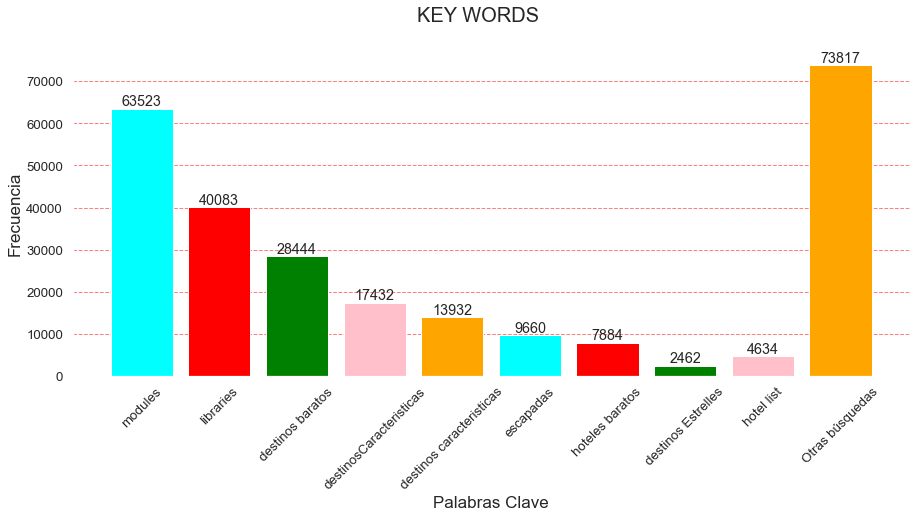

In [307]:
y=Data['Num_Búsquedas']
x=Data['Key_Words']

sns.set(rc={'figure.figsize':(15,6)}, font_scale=1.2)
plt.bar(x, y, align='center',  color=['cyan','red','green','pink','orange'])

for i,n in enumerate(y):
    plt.text( i , n + 10, n, ha='center', va='bottom')

#plt.grid(axis='x',linestyle='dashed', color='red')
ax = plt.axes()
ax.yaxis.grid(True, linestyle='dashed', color='red', alpha=0.5)   
plt.xticks(rotation=45)
ax.set_facecolor('white')
plt.suptitle('KEY WORDS', fontsize=20)
plt.xlabel('Palabras Clave', fontsize=17)
plt.ylabel('Frecuencia',fontsize=17)